In [2]:
import pymysql
import json
import os
import networkx as nx
import freeman as fm
from unidecode import unidecode
import pandas as pd
import numpy as np
import scipy.stats as stats

def run_db_query(connection, query, args=None):
    with connection.cursor() as cursor:
        print('Executando query:')
        cursor.execute(query, args)
        for result in cursor:
            print(result)
            
with open('config_tests.json', 'r') as f:
    config = json.load(f)

conn = pymysql.connect(
    host=config['HOST'],
    user=config['USER'],
    password=config['PASS'],
    database='imdb'
)

In [2]:
id_genero = 28

with open('twomode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 1\n')
        
        movie_ids = []
        
        cursor.execute("SELECT id_filme, title FROM filme INNER JOIN filme_genero using (id_filme) WHERE id_genero = %s", id_genero)
        res = cursor.fetchall()

        for i in res:
            file.write('  node [\n')
            file.write('    id "f_{}"\n'.format(i[0]))
            file.write('    type "filme"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')
            movie_ids.append(i[0])

        cursor.execute("SELECT id_keyword, nome FROM keyword")
        res = cursor.fetchall()

        for i in res:
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i[0]))
            file.write('    type "keyword"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')

        for filme in movie_ids:
            cursor.execute("SELECT id_keyword FROM filme_keyword WHERE id_filme = %s", filme)
            keys = cursor.fetchall()
            
            for key in keys:
                file.write('  edge [\n')
                file.write('    source "f_{}"\n'.format(filme))
                file.write('    target "k_{}"\n'.format(key[0]))
                file.write('  ]\n')

        file.write(']\n')

In [3]:
g1 = fm.load('twomode1.gml')
g1.set_all_nodes('size', 5)
g1.set_all_nodes('labpos', 'hover')
g1.move('bipartite', [n for n in g1.nodes if g1.nodes[n]['type'] == 'filme'])
#g1.draw()

In [4]:
g1.set_nodedata('tipo', 'type')
g1.set_nodedata('nome', 'label')
g1.set_nodedata('indegree', g1.in_degree)
g1.set_nodedata('outdegree', g1.out_degree)
g1.nodeframe

tipo                                               nome  \
f_11        filme                                          Star Wars   
f_18        filme                                  The Fifth Element   
f_22        filme  Pirates of the Caribbean: The Curse of the Bla...   
f_24        filme                                  Kill Bill: Vol. 1   
f_58        filme         Pirates of the Caribbean: Dead Man's Chest   
f_85        filme                            Raiders of the Lost Ark   
f_87        filme               Indiana Jones and the Temple of Doom   
f_89        filme                 Indiana Jones and the Last Crusade   
f_95        filme                                         Armageddon   
f_98        filme                                          Gladiator   
f_104       filme                                       Run Lola Run   
f_106       filme                                           Predator   
f_111       filme                                           Scarface   
f_120       filme  The Lord of the Rings: The Fellowship of the Ring   
f_122       filme      The Lord of the Rings: The Return of the King   
f_134       filme                         O Brother, Where Art Thou?   
f_146       filme                     Crouching Tiger, Hidden Dragon   
f_154       filme                    Star Trek II: The Wrath of Khan   
f_155       filme                                    The Dark Knight   
f_157       filme                Star Trek III: The Search for Spock   
f_169       filme                                         Predator 2   
f_172       filme                    Star Trek V: The Final Frontier   
f_174       filme             Star Trek VI: The Undiscovered Country   
f_180       filme                                    Minority Report   
f_187       filme                                           Sin City   
f_189       filme                       Sin City: A Dame to Kill For   
f_193       filme                             Star Trek: Generations   
f_197       filme                                         Braveheart   
f_199       filme                           Star Trek: First Contact   
f_200       filme                            Star Trek: Insurrection   
...           ...                                                ...   
k_256524  keyword                                      marvel comics   
k_256802  keyword                                     philip k. dick   
k_256812  keyword                          united states countryside   
k_256908  keyword                                        ghost child   
k_256941  keyword                                             mothra   
k_257090  keyword                                 dog man friendship   
k_257194  keyword                                  movie of the year   
k_257225  keyword                                    london, england   
k_257227  keyword                                 marrakesh, morocco   
k_257348  keyword                                        bumi langit   
k_257583  keyword                     in einem land vor unserer zeit   
k_257635  keyword                             inspired by an article   
k_257855  keyword                            jagat sinema bumilangit   
k_257878  keyword                                 neptune the planet   
k_257912  keyword                                    spin the bottle   
k_257938  keyword                                              fenix   
k_258102  keyword                  boyfriend girlfriend relationship   
k_258150  keyword                                              zygon   
k_258164  keyword                                              1880s   
k_258234  keyword                                            lusatia   
k_258270  keyword                                        gotham city   
k_258271  keyword                                         cinderella   
k_258310  keyword                             filmmaking documentary   
k_258503  keyword                                    

In [5]:
h, a = nx.hits(g1)
g1.set_nodedata('hub', h)
g1.set_nodedata('authority', a)
df = g1.nodeframe[g1.nodeframe['tipo'] == 'filme']
df.sort_values('hub', ascending=False)

tipo                                               nome  indegree  \
f_299537  filme                                     Captain Marvel         0   
f_271110  filme                         Captain America: Civil War         0   
f_287947  filme                                            Shazam!         0   
f_1979    filme          Fantastic Four: Rise of the Silver Surfer         0   
f_284053  filme                                     Thor: Ragnarok         0   
f_429617  filme                          Spider-Man: Far from Home         0   
f_283995  filme                     Guardians of the Galaxy Vol. 2         0   
f_102899  filme                                            Ant-Man         0   
f_272     filme                                      Batman Begins         0   
f_100402  filme                Captain America: The Winter Soldier         0   
f_155     filme                                    The Dark Knight         0   
f_24428   filme                                       The Avengers         0   
f_299536  filme                             Avengers: Infinity War         0   
f_284052  filme                                     Doctor Strange         0   
f_99861   filme                            Avengers: Age of Ultron         0   
f_76338   filme                               Thor: The Dark World         0   
f_1452    filme                                   Superman Returns         0   
f_9738    filme                                     Fantastic Four         0   
f_246655  filme                                  X-Men: Apocalypse         0   
f_284054  filme                                      Black Panther         0   
f_1771    filme                 Captain America: The First Avenger         0   
f_44912   filme                                      Green Lantern         0   
f_36647   filme                                              Blade         0   
f_2080    filme                           X-Men Origins: Wolverine         0   
f_49521   filme                                       Man of Steel         0   
f_40662   filme                         Batman: Under the Red Hood         0   
f_49026   filme                              The Dark Knight Rises         0   
f_335983  filme                                              Venom         0   
f_1726    filme                                           Iron Man         0   
f_209112  filme                 Batman v Superman: Dawn of Justice         0   
...         ...                                                ...       ...   
f_119283  filme                                             Parker         0   
f_1825    filme                                       Over the Top         0   
f_596302  filme  Crayon Shin-chan: Honeymoon Hurricane ~The Los...         0   
f_554022  filme                                            Torpedo         0   
f_53111   filme                              Billy The Kid Returns         0   
f_506574  filme                                      Descendants 3         0   
f_10189   filme                                  Pineapple Express         0   
f_516700  filme                                            Gundala         0   
f_566057  filme              Lupinranger VS Patranger VS Kyuranger         0   
f_582083  filme    Kamen Rider Build NEW WORLD: Kamen Rider Grease         0   
f_28656   filme                              Ilsa, the Mad Butcher         0   
f_11128   filme                                          Ladder 49         0   
f_568012  filme                                One Piece: Stampede         0   
f_513045  filme                                             Stuber         0   
f_5174    filme                                        Rush Hour 3         0   
f_15289   filme     Babylon 5: The Lost Tales - Voices in the Dark         0   
f_94866   filme                          Frank Nitti: The Enforcer         0   
f_57718   filme                       Megamind: The Button of Doom         0   
f_15745   f

In [6]:
df = g1.nodeframe[g1.nodeframe['tipo'] == 'keyword']
df.sort_values('authority', ascending=False)

tipo                       nome  indegree  outdegree  hub  \
k_9717    keyword             based on comic        80          0  0.0   
k_9715    keyword                  superhero        72          0  0.0   
k_179430  keyword        aftercreditsstinger        47          0  0.0   
k_179431  keyword       duringcreditsstinger        51          0  0.0   
k_33637   keyword                super power        37          0  0.0   
k_849     keyword                  dc comics        34          0  0.0   
k_180547  keyword  marvel cinematic universe        22          0  0.0   
k_9663    keyword                     sequel        48          0  0.0   
k_209714  keyword                         3d        30          0  0.0   
k_14819   keyword                   violence        42          0  0.0   
k_1308    keyword            secret identity        22          0  0.0   
k_4565    keyword                   dystopia        61          0  0.0   
k_1852    keyword                     mutant        15          0  0.0   
k_155030  keyword             superhero team        11          0  0.0   
k_10761   keyword                 superhuman        11          0  0.0   
k_7002    keyword                  vigilante        10          0  0.0   
k_853     keyword              crime fighter        12          0  0.0   
k_83      keyword           saving the world        21          0  0.0   
k_9748    keyword                    revenge        38          0  0.0   
k_179102  keyword        superhuman strength         9          0  0.0   
k_14760   keyword                  scientist        13          0  0.0   
k_9882    keyword                      space        15          0  0.0   
k_10842   keyword               good vs evil        11          0  0.0   
k_779     keyword               martial arts        22          0  0.0   
k_187056  keyword             woman director        15          0  0.0   
k_14601   keyword                  explosion        22          0  0.0   
k_279     keyword                        usa        13          0  0.0   
k_4375    keyword             transformation         8          0  0.0   
k_697     keyword          loss of loved one        19          0  0.0   
k_14909   keyword             alien invasion        13          0  0.0   
...           ...                        ...       ...        ...  ...   
k_4217    keyword                   exchange         0          0  0.0   
k_156580  keyword                ghost story         0          0  0.0   
k_4247    keyword                    beehive         0          0  0.0   
k_156592  keyword                   evil nun         0          0  0.0   
k_156597  keyword              magic realism         0          0  0.0   
k_156702  keyword                    capture         0          0  0.0   
k_156760  keyword             fake boyfriend         0          0  0.0   
k_156761  keyword          split personality         0          0  0.0   
k_4268    keyword                       fort         0          0  0.0   
k_156777  keyword          teenage sexuality         0          0  0.0   
k_4263    keyword                       duty         0          0  0.0   
k_156795  keyword                      lasso         0          0  0.0   
k_156799  keyword                    vermont         0          0  0.0   
k_156801  keyword                       club         0          0  0.0   
k_156803  keyword                 extinction         0          0  0.0   
k_156810  keyword                    science         0          0  0.0   
k_157136  keyword                   lynching         0          0  0.0   
k_4240    keyword          watergate scandal         0          0  0.0   
k_156823  keyword                    drummer         0          0  0.0   
k_156834  keyword                    adopted         0          0  0.0   
k_156836  keyword                 space race         0          0  0.0   
k_4238    keyword                 chosen one         0          0  0.0   
k_4232    keyword

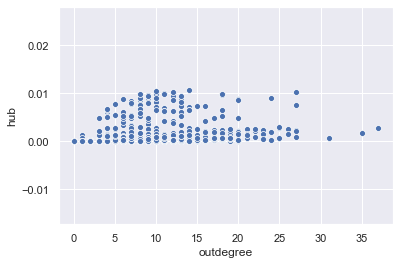

In [7]:
g1.scaplot_nodes('outdegree', 'hub')

In [8]:
with conn.cursor() as cursor:

    keys_movie = {}
    all_keys = []
    keys_used = []
    key_conn = []   #lista com a lista de conecções
    num_conn = []   #lista com numero de filmes iguais

    cursor.execute("SELECT id_filme, id_keyword FROM filme_keyword INNER JOIN filme_genero using (id_filme) WHERE id_genero = %s", id_genero)
    res = cursor.fetchall()

    for filme, key in res:
        if(key in keys_movie):
            keys_movie[key].append(filme)
        else:
            keys_movie[key] = [filme]
        if(key not in all_keys):
            all_keys.append(key)

    for key_value in range(len(all_keys)):
        for comparedk in range(key_value + 1, len(all_keys)):
            num_connections = 0

            if(all_keys[key_value] in keys_movie):
                for movie in keys_movie[all_keys[key_value]]:
                    if(all_keys[comparedk] in keys_movie):
                        if movie in keys_movie[all_keys[comparedk]]:
                            num_connections += 1

            if num_connections > 1:
                if (all_keys[key_value] not in keys_used):
                    keys_used.append(all_keys[key_value])
                if (all_keys[comparedk] not in keys_used):
                    keys_used.append(all_keys[comparedk])
                key_conn.append([all_keys[key_value], all_keys[comparedk]])
                num_conn.append(num_connections)

print(max(set(num_conn), key=num_conn.count))

2


In [9]:
with open('onemode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 0\n')

        for i in keys_used:
            cursor.execute("SELECT nome FROM keyword WHERE id_keyword = %s", i)
            key_name = cursor.fetchone()
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i))
            file.write('    label "{}"\n'.format(unidecode(key_name[0])))
            file.write('  ]\n')

        for i in range(len(key_conn)):
            file.write('  edge [\n')
            file.write('    source "k_{}"\n'.format(key_conn[i][0]))
            file.write('    target "k_{}"\n'.format(key_conn[i][1]))
            file.write('  ]\n')

        file.write(']\n')

In [10]:
g2 = fm.load('onemode1.gml')
g2.set_all_nodes('labpos', 'hover')
#g2.move('kamada_kawai')
g2.move('spring')
g2.draw()

In [12]:
g2.set_nodedata('nome', 'label')
g2.set_nodedata('closeness', nx.closeness_centrality(g2))
g2.set_nodedata('betweenness', nx.betweenness_centrality(g2))
g2.set_nodedata('degree', g2.degree)
g2.set_nodedata('eigenvector', nx.eigenvector_centrality(g2, max_iter=1000))
df2 = g2.nodeframe
df2

nome  closeness  betweenness  degree   eigenvector
k_803                android   0.344788     0.009106      15  2.508410e-02
k_10016           lightsaber   0.261371     0.000000       6  2.717897e-03
k_10527                 jedi   0.274928     0.000107      10  5.330250e-03
k_11196            rebellion   0.275061     0.003192      11  5.337373e-03
k_13194               planet   0.317746     0.000000       3  1.218966e-02
k_155336            smuggler   0.253543     0.000000       1  9.332433e-04
k_160134           the force   0.261371     0.000000       6  2.717897e-03
k_161176         space opera   0.341056     0.043469      37  3.026699e-02
k_178710        stormtrooper   0.275730     0.000185       8  4.315207e-03
k_3801          space travel   0.338815     0.013888      12  2.711436e-02
k_9951                 alien   0.388211     0.032372      41  7.432390e-02
k_4565              dystopia   0.457400     0.148556     111  2.542281e-01
k_226177           xenomorph   0.339220     0.000250       7  2.181376e-02
k_9663                sequel   0.449070     0.094929      75  1.651085e-01
k_1612            spacecraft   0.375116     0.016820      26  4.833478e-02
k_3388          space colony   0.330715     0.000146       7  1.949343e-02
k_4270                galaxy   0.251519     0.000000       1  1.126089e-03
k_10013           death star   0.274396     0.000244       8  4.172631e-03
k_163295        galactic war   0.251631     0.000000       2  1.281334e-03
k_526                  rebel   0.326338     0.002352       8  1.453090e-02
k_2902          space battle   0.277619     0.000114       9  5.789291e-03
k_11491          cult figure   0.251631     0.000000       2  1.281334e-03
k_11322   female protagonist   0.213706     0.000000       1  1.985793e-04
k_402                  clone   0.329370     0.000982       5  2.141967e-02
k_679                 cyborg   0.348174     0.003022      12  4.245213e-02
k_10842         good vs evil   0.355151     0.008237      14  3.874047e-02
k_1423              asteroid   0.281337     0.000142       6  4.576223e-03
k_1430        self sacrifice   0.313530     0.002844       7  1.141011e-02
k_9882                 space   0.385572     0.016216      31  7.305983e-02
k_1399                senate   0.251519     0.000000       1  1.126089e-03
...                      ...        ...          ...     ...           ...
k_4424                  pain   0.217726     0.000000       3  2.808590e-04
k_6241             stupidity   0.217726     0.000000       3  2.808590e-04
k_2434            liberation   0.200345     0.000000       2  3.514874e-05
k_11199       undercover cop   0.273075     0.000000       1  3.337518e-03
k_11004        rural setting   0.273075     0.000000       1  3.337518e-03
k_253606      4th century bc   0.223386     0.000000       1  2.066366e-04
k_8985                  zeus   0.223386     0.000000       1  2.066366e-04
k_2808               russian   0.001613     0.000000       1  2.682613e-37
k_2106              cold war   0.001613     0.000000       1  2.682613e-37
k_2868               crusade   0.005279     0.000000       1  3.146338e-25
k_220707        12th century   0.009677     0.000047       6  1.291724e-24
k_10466               knight   0.005279     0.000000       1  3.146338e-25
k_4147            robin hood   0.007258     0.000000       4  1.168470e-24
k_4393                archer   0.007258     0.000000       4  1.168470e-24
k_11525      sherwood forest   0.007258     0.000000       4  1.168470e-24
k_18101        bow and arrow   0.007258     0.000000       4  1.168470e-24
k_10244     based on cartoon   0.231689     0.000000       1  3.504916e-04
k_3312       nuclear missile   0.212505     0.000000       1  2.261607e-04
k_180172   framed for murder   0.263803     0.000000       2  1.516119e-03
k_4152               kingdom   0.001613     0.000000       1  2.682613e-37
k_162715               ruins   0.001613     0.000000       1  2.682613e-37
k_2804          exploitation   0.001613     0.000

In [3]:
with conn.cursor() as cursor:
    movie_keys = {}
    all_movies = []
    movies_used = []
    movie_conn = []
    num_conn = []
    
    cursor.execute("SELECT id_filme, id_keyword FROM filme_keyword INNER JOIN filme_genero using (id_filme) WHERE id_genero = %s", id_genero)
    res = cursor.fetchall()

    for filme, key in res:
        if(filme in movie_keys):
            movie_keys[filme].append(key)
        else:
            movie_keys[filme] = [key]
        if(filme not in all_movies):
            all_movies.append(filme)
    
    for movie_value in range(len(all_movies)):
        for comparedm in range(movie_value + 1, len(all_movies)):
            num_connections = 0

            if(all_movies[movie_value] in movie_keys):
                for key in movie_keys[all_movies[movie_value]]:
                    if(all_movies[comparedm] in movie_keys):
                        if key in movie_keys[all_movies[comparedm]]:
                            num_connections += 1

            if num_connections > 1:
                if (all_movies[movie_value] not in movies_used):
                    movies_used.append(all_movies[movie_value])
                if (all_movies[comparedm] not in movies_used):
                    movies_used.append(all_movies[comparedm])
                movie_conn.append([all_movies[movie_value], all_movies[comparedm]])
                num_conn.append(num_connections)

print(max(set(num_conn), key=num_conn.count))

2


In [4]:
with open('onemode2.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 0\n')

        for i in movies_used:
            cursor.execute("SELECT title FROM filme WHERE id_filme = %s", i)
            movie_title = cursor.fetchone()
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i))
            file.write('    label "{}"\n'.format(unidecode(movie_title[0])))
            file.write('  ]\n')

        for i in range(len(movie_conn)):
            file.write('  edge [\n')
            file.write('    source "k_{}"\n'.format(movie_conn[i][0]))
            file.write('    target "k_{}"\n'.format(movie_conn[i][1]))
            file.write('  ]\n')

        file.write(']\n')

In [5]:
g3 = fm.load('onemode2.gml')
g3.set_all_nodes('labpos', 'hover')
#g3.move('kamada_kawai')
g3.move('spring')
g3.draw()

In [24]:
g3.set_nodedata('title', 'label')
g3.set_nodedata('closeness', nx.closeness_centrality(g3))
g3.set_nodedata('betweenness', nx.betweenness_centrality(g3))
g3.set_nodedata('degree', g3.degree)
g3.set_nodedata('eigenvector', nx.eigenvector_centrality(g3, max_iter=1000))
df3 = g3.nodeframe
df3

title  closeness  \
k_11                                         Star Wars   0.298288   
k_201                               Star Trek: Nemesis   0.322664   
k_1891                         The Empire Strikes Back   0.310749   
k_1892                              Return of the Jedi   0.295536   
k_1893       Star Wars: Episode I - The Phantom Menace   0.276233   
k_1894    Star Wars: Episode II - Attack of the Clones   0.322539   
k_1895    Star Wars: Episode III - Revenge of the Sith   0.269530   
k_8077                                          Alien3   0.396157   
k_8078                              Alien Resurrection   0.379034   
k_140607                  Star Wars: The Force Awakens   0.322289   
k_181808                      Star Wars: The Last Jedi   0.335799   
k_330459                  Rogue One: A Star Wars Story   0.346410   
k_348350                       Solo: A Star Wars Story   0.303725   
k_18                                 The Fifth Element   0.387857   
k_85                           Raiders of the Lost Ark   0.330996   
k_180                                  Minority Report   0.381989   
k_199                         Star Trek: First Contact   0.305059   
k_200                          Star Trek: Insurrection   0.292836   
k_679                                           Aliens   0.323415   
k_1103                            Escape from New York   0.371761   
k_1572                      Die Hard: With a Vengeance   0.441972   
k_1726                                        Iron Man   0.395217   
k_2164                                        Stargate   0.325436   
k_7191                                     Cloverfield   0.410201   
k_8452                                     The 6th Day   0.326585   
k_9679                           Gone in Sixty Seconds   0.414899   
k_9691                                       Assassins   0.365723   
k_9693                                 Children of Men   0.377147   
k_9739                                  Demolition Man   0.447912   
k_9946                                     End of Days   0.342143   
...                                                ...        ...   
k_324552                          John Wick: Chapter 2   0.298288   
k_10680                           D3: The Mighty Ducks   0.169298   
k_11164                           D2: The Mighty Ducks   0.204245   
k_10775                               Infernal Affairs   0.269617   
k_10782                                          Basic   0.245975   
k_80389                                 Get the Gringo   0.273332   
k_10921                  Babylon 5: The River of Souls   0.001758   
k_10942                       Babylon 5: The Gathering   0.002638   
k_10940                    Babylon 5: In the Beginning   0.002638   
k_10941                          Babylon 5: Thirdspace   0.001758   
k_10999                                       Commando   0.260593   
k_168530                                    Ride Along   0.260105   
k_15417                      Every Which Way But Loose   0.237966   
k_254128                                   San Andreas   0.269792   
k_11144                      They Called Him Bulldozer   0.232909   
k_11851                                   The Presidio   0.257214   
k_11344                             A Bittersweet Life   0.275229   
k_67390                                 Avenging Angel   0.268834   
k_11969                                      Tombstone   0.203398   
k_59440                                        Warrior   0.277891   
k_68995                                   Born to Ride   0.300547   
k_91865                                    Caged Women   0.211612   
k_18550                                           Fled   0.249511   
k_19585                                        G-Force   0.285705   
k_20533                                      Jonah Hex   0.236412   
k_76942                           The Kyoto Connection   0.268834   
k_324852                               Despicab

In [25]:
df3["revenue"] = None

with conn.cursor() as cursor:
    for movie in movies_used:

        cursor.execute("SELECT revenue FROM filme WHERE id_filme = %s AND revenue > 50", movie)
        revenue = cursor.fetchone()

        df3.loc[df3.index == "k_" + str(movie), 'revenue'] = revenue

df3 = df3.dropna(subset=['revenue'])
df3 = df3.sort_values('revenue', ascending=True)
df3.head(60)

title  closeness  betweenness  degree  \
k_15417      Every Which Way But Loose   0.237966     0.000011       2   
k_10772                         Django   0.211720     0.000000       1   
k_8374             The Boondock Saints   0.280794     0.000000       1   
k_291356       In a Valley of Violence   0.388038     0.001330      34   
k_18555                        Foxfire   0.360033     0.002989      19   
k_346                    Seven Samurai   0.322414     0.001964      13   
k_12653                      Romasanta   0.244531     0.000000       1   
k_934                           Rififi   0.295118     0.000000       2   
k_55846                          Blitz   0.381989     0.003099      34   
k_48572                      Red State   0.331259     0.000301      26   
k_127493                        Stolen   0.303725     0.000012       5   
k_9323              Ghost in the Shell   0.375109     0.006146      36   
k_168705                    BloodRayne   0.303504     0.000000       4   
k_180299                    The Raid 2   0.377318     0.001584      30   
k_1946                        eXistenZ   0.298930     0.000000       5   
k_166076             Superman: Unbound   0.331919     0.000024      38   
k_14911                         Bat*21   0.297542     0.000017       4   
k_10388                      The Limey   0.333247     0.000491      12   
k_22584           To Have and Have Not   0.252383     0.000000       1   
k_382322      Batman: The Killing Joke   0.389489     0.001110      98   
k_10617      Once Upon a Time in China   0.320800     0.000061       6   
k_11645                            Ran   0.322164     0.001130      11   
k_11524                          Thief   0.301963     0.000005       4   
k_242643     Batman: Assault on Arkham   0.380245     0.000387      86   
k_16608                The Proposition   0.370604     0.002837      26   
k_217993           Justice League: War   0.349755     0.000082      52   
k_7299                     Equilibrium   0.296378     0.000026       3   
k_14919   Batman: Mask of the Phantasm   0.346843     0.000042      47   
k_9542                     The Hitcher   0.282317     0.000000       1   
k_8009                      Highlander   0.266342     0.000000       2   
k_7873                     Harsh Times   0.231937     0.000000       1   
k_37931                      MacGruber   0.327226     0.000000      25   
k_10544                      Ned Kelly   0.270668     0.000018       2   
k_40662     Batman: Under the Red Hood   0.394095     0.002948     101   
k_12088                       Fortress   0.387677     0.003519      38   
k_3482                       The Train   0.338803     0.003003      15   
k_23759                      Centurion   0.226022     0.000000       2   
k_9039                         Trapped   0.319569     0.000011       7   
k_9626                       Red Sonja   0.299144     0.000048       3   
k_7549                        Fearless   0.312146     0.000035       7   
k_10529                      Outlander   0.314503     0.001445      14   
k_17339         Force 10 from Navarone   0.288376     0.000009       2   
k_104                     Run Lola Run   0.240716     0.000000       1   
k_15573                    The Cowboys   0.001172     0.000000       1   
k_10428                        Hackers   0.318958     0.003970      10   
k_32985                   Solomon Kane   0.371264     0.001873      22   
k_11504              Suburban Commando   0.256581     0.000000       1   
k_10694                      The Chase   0.409797     0.012659      63   
k_12584                   The Shootist   0.320676     0.000000       4   
k_14636                  The Condemned   0.341022     0.000714      11   
k_10775               Infernal Affairs   0.269617     0.000000       2   
k_20481                     Nightbreed   0.295222     0.000000       2   
k_3089                       Red River   0.001172     0.000000       1   
k_70074             Bullet to the Hea

In [26]:
df3.plot.scatter("betweenness", "revenue")

ValueError: scatter requires y column to be numeric

In [21]:
np.corrcoef(df3.betweenness, df3.revenue)

array([[1.        , 0.14623663],
       [0.14623663, 1.        ]])

In [16]:
stats.pearsonr(df3.betweenness, df3.revenue)

(0.10867420501083631, 0.0035739117842235914)